In [1]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np 

# read audio samples
input_data = read("9979_PV.wav")
audio = input_data[1]
# plot the first 1024 samples
audio = audio[8000:16000]/ np.max(audio)


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import pyhrv
from scipy.fft import fft, fftfreq



In [12]:
df = pd.read_csv("Pulse Cartoid.txt",sep='\s+',header= None)
df=pd.DataFrame(df)
x = np.arange(len(df))/1000
y = np.array(df[df.columns[0]])
y = y 

In [3]:
fs = 1000
plt.figure(figsize=((13,9)))
plt.plot(x[0:1000]/fs,y[0:1000])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

NameError: name 'x' is not defined

<Figure size 1300x900 with 0 Axes>

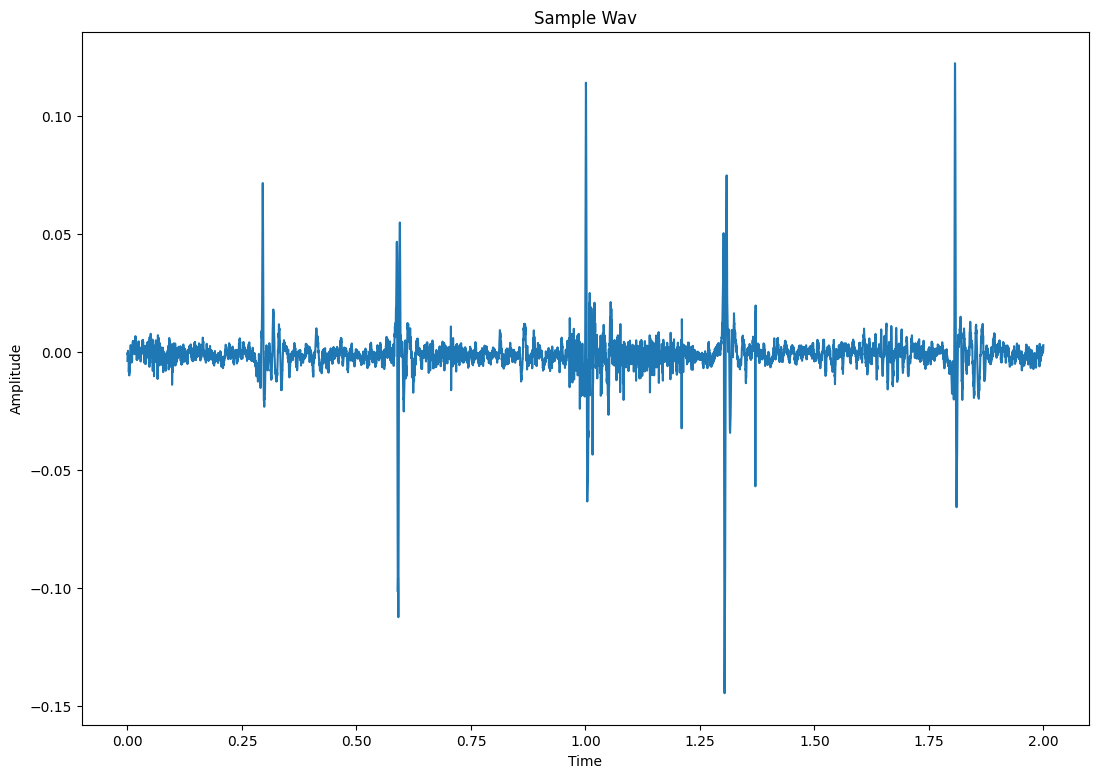

In [2]:
import numpy as np
fs = 4000
a = np.arange(len(audio))
plt.figure(figsize=((13,9)))
plt.plot(a/fs,audio)
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

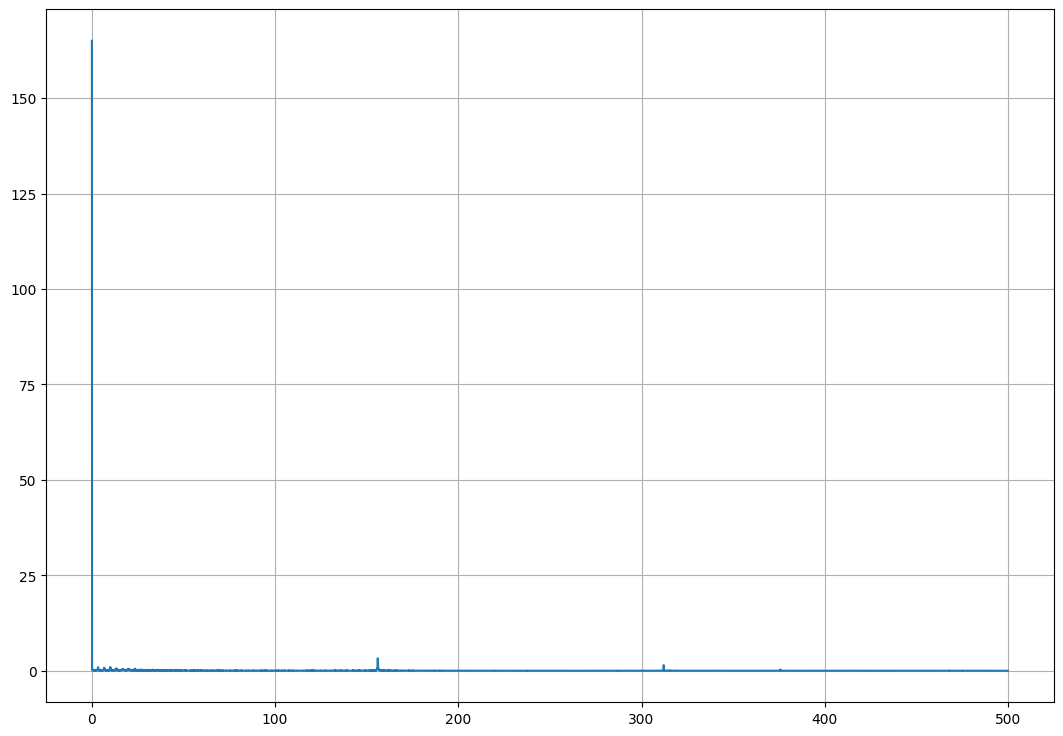

In [14]:
from scipy.fft import fft, fftfreq
N = len(y)
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int)     
yf = fft(y)
plt.figure(figsize=((13,9)))
plt.plot(k[0:N//2]*fs/N, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

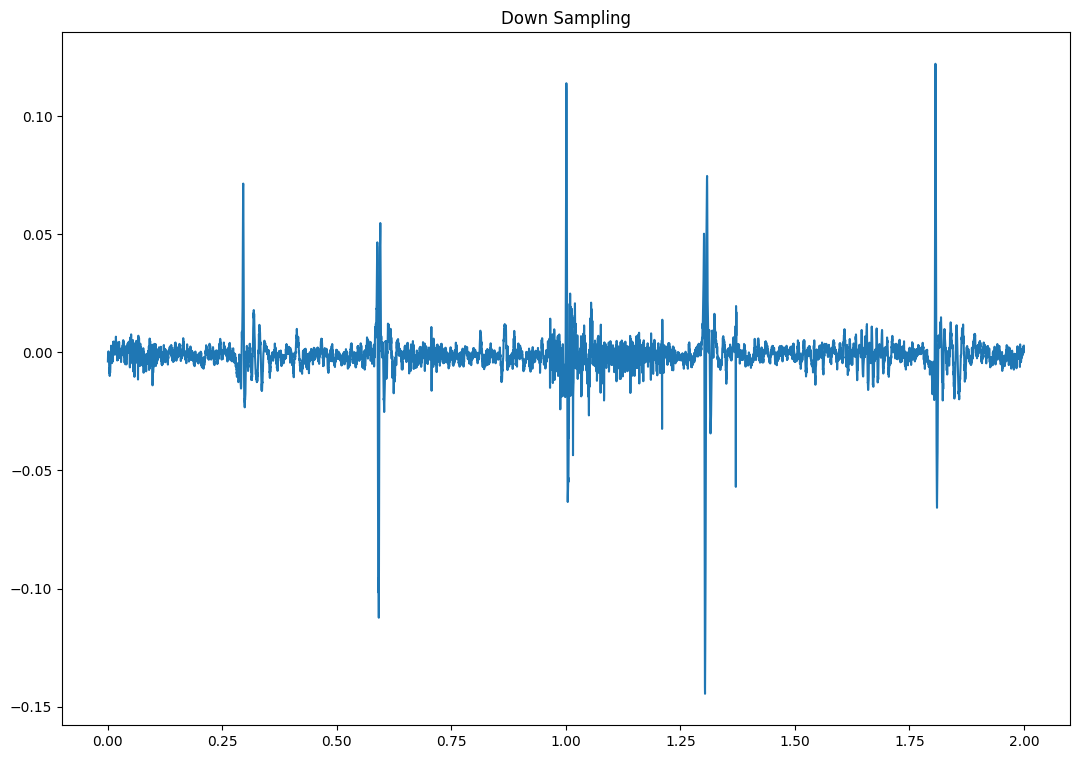

In [4]:
# decimate / down sampling 
# N nya global 
fcd = np.pi / N 
Ndw = 2 
def lpffir (omc,i):
    if i == 0 :
        y = omc/np.pi
        return y 
    else :
        y = np.sin(omc*i)/(i*np.pi)
        return y 
omc = (2*np.pi*fcd) *fs

yn = np.zeros(round(N/Ndw))
#audio Global 

for n in range(round(N/Ndw)):
    for m in range(Ndw):
        yn[n] += lpffir(omc,m) * audio[n*Ndw-m]

# a menjadi global 
a1= np.arange(len(yn))
plt.figure(figsize=((13,9)))
plt.title("Down Sampling")
plt.plot(a/4000,audio)
#plt.plot(a1/2000,yn)


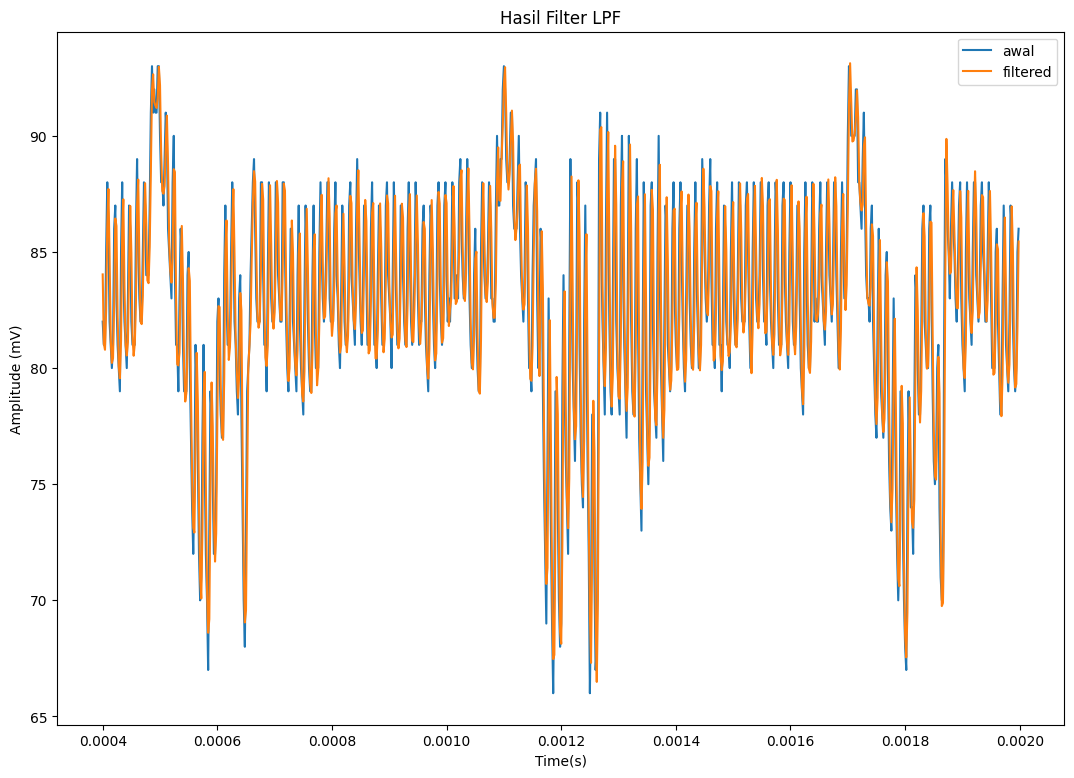

In [15]:
fs = fs /2 
cutoff_frequency =200
sampling_period = 1/fs
orde=2

yn = y
y = np.zeros(len(yn))  # Initialize the output signal
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period

for n in range(2, len(yn)):
    y[n] = (((8/sampling_period_squared)-2*omega_c_squared) * y[n-1]
            - ((4/sampling_period_squared) - (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared) * y[n-2]
            + omega_c_squared * yn[n]
            + 2 * omega_c_squared * yn[n-1]
            + omega_c_squared * yn[n-2]) / ((4/sampling_period_squared) + (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared)

filtered_lowpassMAV = y
plt.figure(figsize=((13,9)))
plt.plot(x[200:1000]/fs,yn[200:1000],label="awal")
plt.plot(x[200:1000]/fs,filtered_lowpassMAV[200:1000],label="filtered")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Filter LPF")
plt.show()

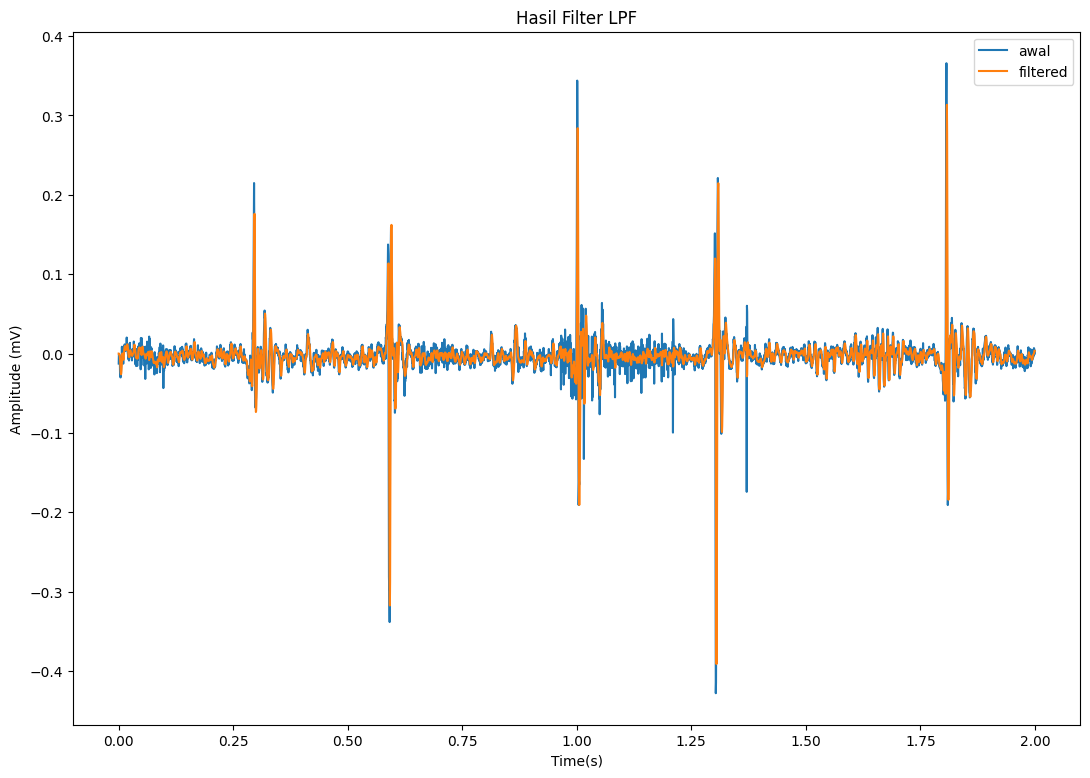

In [5]:
fs = fs /2 
cutoff_frequency = 250
sampling_period = 1/fs
orde=2

y = np.zeros(len(yn))  # Initialize the output signal
omega_c = 2 * np.pi * cutoff_frequency
omega_c_squared = omega_c*omega_c
sampling_period_squared = sampling_period*sampling_period

for n in range(2, len(yn)):
    y[n] = (((8/sampling_period_squared)-2*omega_c_squared) * y[n-1]
            - ((4/sampling_period_squared) - (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared) * y[n-2]
            + omega_c_squared * yn[n]
            + 2 * omega_c_squared * yn[n-1]
            + omega_c_squared * yn[n-2]) / ((4/sampling_period_squared) + (2 * np.sqrt(2) * omega_c / sampling_period) + omega_c_squared)

filtered_lowpassMAV = y
plt.figure(figsize=((13,9)))
plt.plot(a1/fs,yn,label="awal")
plt.plot(a1/fs,filtered_lowpassMAV,label="filtered")
plt.legend()
plt.xlabel("Time(s)")
plt.ylabel("Amplitude (mV)")
plt.title("Hasil Filter LPF")
plt.show()

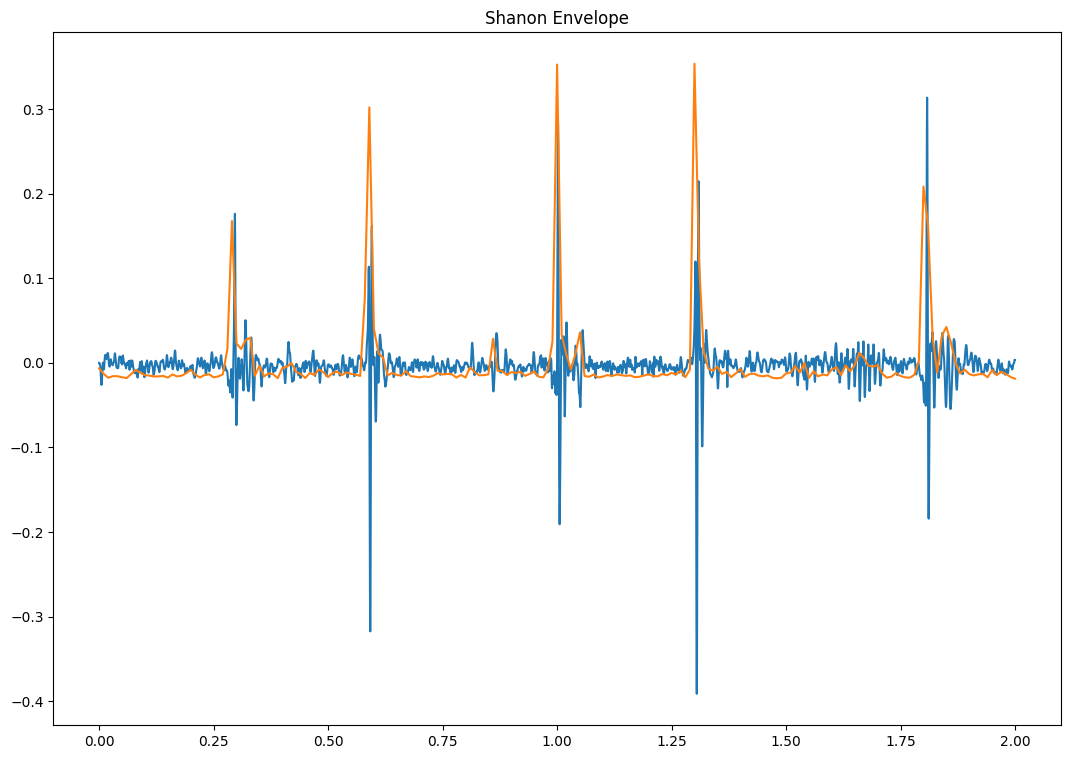

In [6]:
#Shanon Envelope 
filtered_highpassMAV=filtered_lowpassMAV
fs = 2000
Ns = 20
xab = np.abs(filtered_highpassMAV)
xma = np.max(xab)
xnor = np.zeros(len(filtered_highpassMAV)+Ns)
for i in range(len(filtered_highpassMAV)):
    xnor[i] = xab[i]/xma


#shanon Energy 
et = np.zeros(len(filtered_highpassMAV))

lgth = int(len(xnor)/Ns)
es = np.zeros(lgth)

for s in range(lgth):
    for i in range(s*(round(Ns)),(s*(round(Ns)))+Ns):
        if xnor[i] > 0:
            es[s] += np.square(xnor[i]) * np.log10(np.square(xnor[i]))
        else :
            es[s] = 0
    es[s] = es[s] * (1/-Ns)

Pts = np.zeros(len(es))
mean_es = np.mean(es)
std_es = np.std(es)

for t in range(lgth):
    Pts[t] = ((es[t]-mean_es)/(std_es))*0.05


x = np.arange(len(Pts))
plt.figure(figsize=((13,9)))
plt.title("Shanon Envelope")
plt.plot(a1/fs,filtered_lowpassMAV)
plt.plot(x/(fs/Ns),Pts)


In [14]:
#Hilbert Envelope 
Ht = np.zeros(len(filtered_highpassMAV))
eh = np.zeros(len(filtered_highpassMAV))
for t in range(len(filtered_highpassMAV)):
    for ta in range(len(filtered_highpassMAV)):
        if (ta-t) == 0:
            continue
        else:
            Ht[t] += filtered_highpassMAV[ta] /(ta-t)

for x in range(len(filtered_highpassMAV)):
    et[x] = np.sqrt(np.square(filtered_highpassMAV[x]) + np.square(Ht[x]))



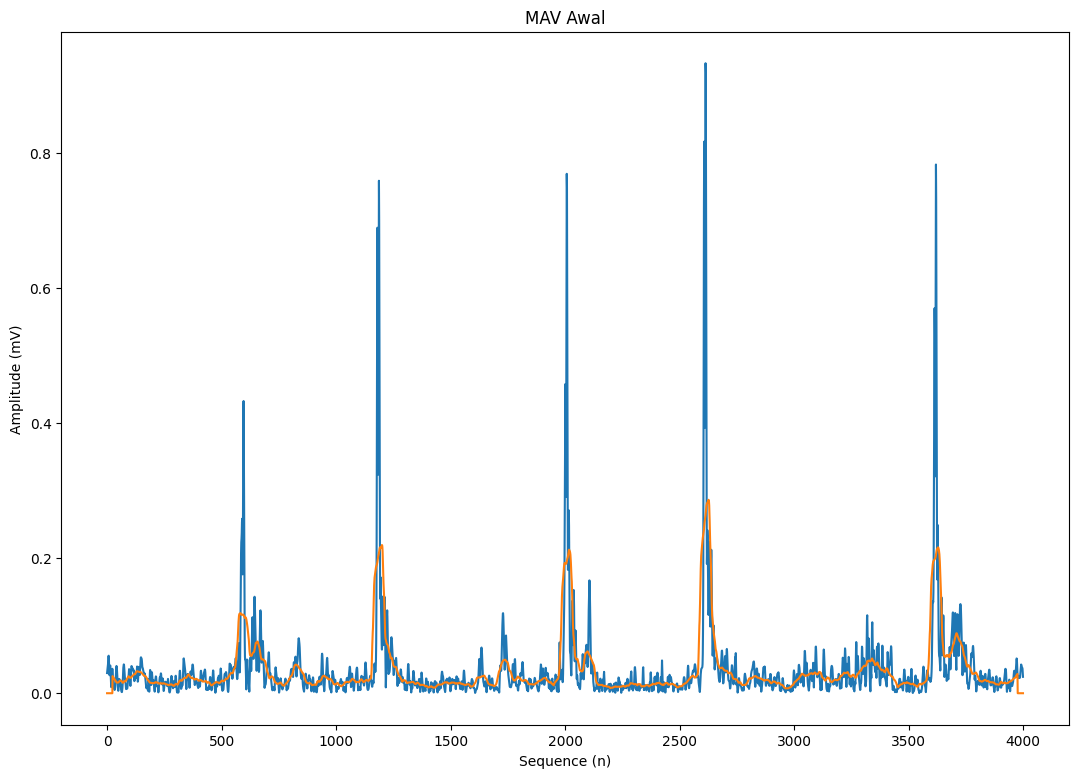

In [25]:
sum = 0
window=50
mAver = []
k = int((window-1)/2)
for i in range(k, len(et)-k):
    for ii in range(i-k, i+k):
        sum = sum + et[ii]
    mAver.append(sum / window)
    sum = 0
zeros = [0]*k
mAver = zeros + mAver +zeros

plt.figure(figsize=((13,9)))
plt.plot(et)
plt.plot(mAver)
plt.xlabel("Sequence (n)")
plt.ylabel("Amplitude (mV)")
plt.title("MAV Awal")
plt.show()

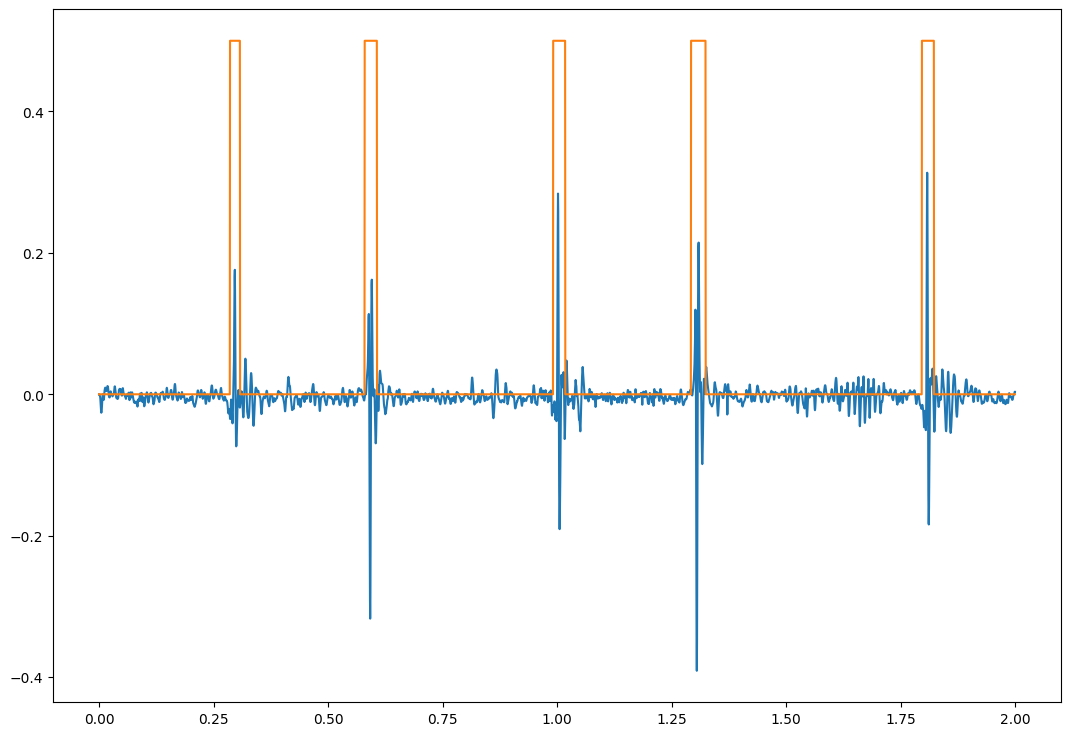

In [26]:
for t in range(len(et)):
    if mAver[t] < 0.09: 
        mAver[t] = 0
    else :
        mAver[t] =0.5
a= np.arange(len(et))
plt.figure(figsize=((13,9)))
plt.plot(a/fs,filtered_highpassMAV)
plt.plot(a/2000,mAver)

In [27]:
aw = []
bl = []
jml = 0 

for n in range(len(mAver)):
    if (mAver[n]==0.5)and(mAver[n-1]==0):
        aw.append(n)
    if (mAver[n]==0) and (mAver[n-1]==0.5):
        bl.append(n)
        jml+=1
aw = np.array(aw)
bl = np.array(bl)

# length
s1l = np.zeros(int(np.ceil(jml/2)))
s2l = np.zeros(int(np.ceil(jml/2)))
sysl = np.zeros(int(np.ceil(jml/2)))
dysl = np.zeros(int(np.ceil(jml/2)))

jh = 0
for i in range(jml):
    if i % 2 == 0:
        s1l[jh] = np.abs(aw[i]-bl[i])
    else :
        s2l[jh] = np.abs(aw[i]-bl[i])
        jh+= 1

jh = 0
for i in range(jml):
    if i == 0 :
        continue
    if i % 2 == 1:
        sysl[jh] = aw[i] - bl[i-1]
    if i%2 == 0:
        dysl[jh] = aw[i] - bl[i-1]
        jh +=1
dysl[(int(np.ceil(jml/2)))-1] = np.abs(len(mAver) - bl[i])
s1l = s1l/fs
s2l = s2l/fs 
dysl = dysl/fs
sysl = sysl/fs

#fitur ekstrasi time domain 
ms1 = np.mean(s1l)
std1 = np.std(s1l)
ms2 = np.mean(s2l)
std2 = np.std(s2l)
msys = np.mean(sysl)
std_sys = np.std(sysl)
mdys = np.mean(dysl)
std_dys = np.std(dysl)


In [11]:
#fitur ekstrasi freq
jh = 0
s1d = np.zeros(int(np.ceil(jml/2)))
s2d = np.zeros(int(np.ceil(jml/2)))
sysd = np.zeros(int(np.ceil(jml/2)))
dysd = np.zeros(int(np.ceil(jml/2)))
for i in range (jml):
    if i % 2 == 0:
        s1p = filtered_highpassMAV[aw[i]:bl[i]]
        N = len(s1p)
        n = np.arange(0,N,1,dtype=int)
        k = np.arange(0,N,1,dtype=int) 
        yf = fft(s1p) 
        for n in range(N//2):
            s1d[jh] += np.abs(yf[n])
    else :
        s2p = filtered_highpassMAV[aw[i]:bl[i]]
        N = len(s2p)
        n = np.arange(0,N,1,dtype=int)
        k = np.arange(0,N,1,dtype=int) 
        yf = fft(s2p) 
        for n in range(N//2):
            s2d[jh] += np.abs(yf[n])
        jh+= 1   

jh = 0
for i in range(jml):
    if i == 0 :
        continue
    if i % 2 == 1:
        sysp = filtered_highpassMAV[bl[i-1]:aw[i]]
        N = len(sysp)
        n = np.arange(0,N,1,dtype=int)
        k = np.arange(0,N,1,dtype=int) 
        yf = fft(sysp) 
        for n in range(N//2):
            sysd[jh] += np.abs(yf[n])          
    if i%2 == 0:
        dysp = filtered_highpassMAV[bl[i-1]:aw[i]]
        N = len(dysp)
        n = np.arange(0,N,1,dtype=int)
        k = np.arange(0,N,1,dtype=int) 
        yf = fft(dysp) 
        for n in range(N//2):
            dysd[jh] += np.abs(yf[n])
        jh +=1

dysp = filtered_highpassMAV[bl[i]:len(mAver)]
N = len(dysp)
n = np.arange(0,N,1,dtype=int)
k = np.arange(0,N,1,dtype=int) 
yf = fft(dysp) 
for n in range(N//2):
    dysd[(int(np.ceil(jml/2)))-1] += np.abs(yf[n])  

#fitur ekstrasi Frekuensi domain
means1d = np.mean(s1d)
means2d = np.mean(s2d)
stds1d = np.std(s1d)
stds2d = np.std(s2d)
mean_sysd = np.mean(sysd)
std_sysd = np.std(sysd)
mean_dysd = np.mean(dysd)
std_dysd = np.std(dysd)

In [12]:
#Membuat data training 
import pandas as pd 
#Time Domain
df_ms1 = pd.DataFrame({'Mean S1': [ms1]})
df_ms2 = pd.DataFrame({'Mean S2': [ms2]})
df_msys = pd.DataFrame({'Mean Sys': [msys]})
df_mdys = pd.DataFrame({'Mean Dys': [mdys]})

df_stds1 = pd.DataFrame({'Std S1': [std1]})
df_stds2 = pd.DataFrame({'Std S2': [std2]})
df_stdsys = pd.DataFrame({'Std Sys': [std_sys]})
df_stddys = pd.DataFrame({'Std Dys': [std_dys]})

#Frequency Domain 
df_means1d = pd.DataFrame({'F Mean S1': [means1d]})
df_means2d = pd.DataFrame({'F Mean S2': [means2d]})
df_meansysd = pd.DataFrame({'F Mean Sys': [mean_sysd]})
df_meandysd = pd.DataFrame({'F Mean Dys': [mean_dysd]})

df_stds1d = pd.DataFrame({'F Std S1': [stds1d]})
df_stds2d = pd.DataFrame({'F Std S2': [stds2d]})
df_stdsysd = pd.DataFrame({'F Std Sys': [std_sysd]})
df_stddysd = pd.DataFrame({'F Std Dys': [std_dysd]})
df_hasil = pd.DataFrame({'0/1':[0]})

In [13]:
df_result = pd.concat([df_ms1, 
                       df_ms2, 
                       df_msys, 
                       df_mdys, 
                       df_stds1,
                       df_stds2, 
                       df_stdsys,
                       df_stddys, 
                       df_means1d, 
                       df_means2d, 
                       df_meansysd,
                       df_meandysd,
                       df_stds1d,
                       df_stds2d,
                       df_stdsysd,
                       df_stddysd,
                       df_hasil], axis=1)
df1=pd.DataFrame(df_result)
df1

,Mean S1,Mean S2,Mean Sys,Mean Dys,Std S1,Std S2,Std Sys,Std Dys,F Mean S1,F Mean S2,F Mean Sys,F Mean Dys,F Std S1,F Std S2,F Std Sys,F Std Dys,0/1
0,0.027,0.024,0.19,0.3305,0.002121,0.010801,0.115265,0.139256,8.157332,8.639117,22.671064,47.079175,2.44982,5.953445,14.409619,26.056413,0


In [14]:
reader = pd.read_excel("fitur.xlsx")
writer = pd.ExcelWriter("fitur.xlsx",mode="a",if_sheet_exists="overlay")
df1.to_excel(writer,index = False,header=False,startrow= len(reader)+1)
writer.close()
print("done")
#df1.to_excel(r'fitur.xlsx',index=False)

done
